# Modelling

## Imports

In [141]:
# Importing the basic libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.formula import api

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings("ignore")

**NOTE:**
- We will import data from the Pre-processing notebook.

In [142]:
Train_X_std = pd.read_csv("datasets/Train_X_std.csv")
Test_X_std = pd.read_csv("datasets/Test_X_std.csv")
display(Train_X_std.head())
display(Test_X_std.head())

,holiday_flag,temperature,fuel_price,cpi,unemployment,store_2,store_3,store_4,store_5,store_6,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012
0,-0.27382,1.387482,0.997707,-1.172478,0.428047,-0.153805,-0.154519,-0.147979,-0.148719,-0.158046,...,-0.313112,-0.301235,-0.31513,-0.302891,-0.321136,-0.323519,-0.255177,3.459773,1.320423,-0.638971
1,-0.27382,-0.433635,-1.017613,0.976518,-0.579850,-0.153805,-0.154519,-0.147979,-0.148719,6.327281,...,-0.313112,-0.301235,-0.31513,-0.302891,-0.321136,-0.323519,-0.255177,3.459773,-0.757333,-0.638971
2,-0.27382,1.664716,1.026030,-1.175951,0.619144,-0.153805,-0.154519,-0.147979,-0.148719,-0.158046,...,-0.313112,3.319669,-0.31513,-0.302891,-0.321136,-0.323519,-0.255177,-0.289036,1.320423,-0.638971
3,-0.27382,-0.174411,0.402915,-1.184842,-1.435354,-0.153805,-0.154519,6.757712,-0.148719,-0.158046,...,-0.313112,-0.301235,-0.31513,-0.302891,-0.321136,-0.323519,-0.255177,-0.289036,1.320423,-0.638971
4,-0.27382,0.793177,1.073962,0.867124,-0.364563,-0.153805,-0.154519,-0.147979,-0.148719,-0.158046,...,-0.313112,-0.301235,3.17329,-0.302891,-0.321136,-0.323519,-0.255177,-0.289036,1.320423,-0.638971


,holiday_flag,temperature,fuel_price,cpi,unemployment,store_2,store_3,store_4,store_5,store_6,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012
0,-0.273820,1.431687,-0.109085,1.295626,-0.856417,-0.153805,6.471699,-0.147979,-0.148719,-0.158046,...,-0.313112,3.319669,-0.31513,-0.302891,-0.321136,-0.323519,-0.255177,-0.289036,-0.757333,1.565016
1,3.652034,-0.422175,-0.856387,0.906294,0.604631,-0.153805,-0.154519,-0.147979,-0.148719,-0.158046,...,-0.313112,-0.301235,-0.31513,-0.302891,-0.321136,-0.323519,-0.255177,3.459773,-0.757333,-0.638971
2,-0.273820,0.023145,1.226473,-0.988542,0.509485,-0.153805,-0.154519,-0.147979,-0.148719,-0.158046,...,-0.313112,-0.301235,-0.31513,-0.302891,3.113941,-0.323519,-0.255177,-0.289036,1.320423,-0.638971
3,-0.273820,0.105005,2.041316,-1.130774,-0.146051,-0.153805,-0.154519,-0.147979,-0.148719,-0.158046,...,-0.313112,-0.301235,-0.31513,-0.302891,-0.321136,-0.323519,-0.255177,-0.289036,-0.757333,1.565016
4,3.652034,1.112978,-1.793239,0.908392,0.511098,-0.153805,-0.154519,-0.147979,-0.148719,-0.158046,...,-0.313112,-0.301235,-0.31513,-0.302891,-0.321136,3.091007,-0.255177,-0.289036,-0.757333,-0.638971


In [143]:
Train_X_std["holiday_flag"].unique()

array([-0.27382004,  3.6520336 ])

In [144]:
Train_X_std["holiday_flag"] = np.where(Train_X_std["holiday_flag"] < 0, 0, 1)
Test_X_std["holiday_flag"] = np.where(Test_X_std["holiday_flag"] < 0, 0, 1)

In [145]:
Train_X_std = Train_X_std[["holiday_flag","temperature","fuel_price","cpi","unemployment"]]
Test_X_std = Test_X_std[["holiday_flag","temperature","fuel_price","cpi","unemployment"]]
display(Train_X_std.head())
display(Test_X_std.head())

,holiday_flag,temperature,fuel_price,cpi,unemployment
0,0,1.387482,0.997707,-1.172478,0.428047
1,0,-0.433635,-1.017613,0.976518,-0.579850
2,0,1.664716,1.026030,-1.175951,0.619144
3,0,-0.174411,0.402915,-1.184842,-1.435354
4,0,0.793177,1.073962,0.867124,-0.364563


,holiday_flag,temperature,fuel_price,cpi,unemployment
0,0,1.431687,-0.109085,1.295626,-0.856417
1,1,-0.422175,-0.856387,0.906294,0.604631
2,0,0.023145,1.226473,-0.988542,0.509485
3,0,0.105005,2.041316,-1.130774,-0.146051
4,1,1.112978,-1.793239,0.908392,0.511098


**NOTE:**

- Using one-hot encoding on the store number, weekday, month and year columns makes the data too granular and convoluted as evidenced by the PCA decomposition in the pre-processing notebook.
    - It should be noted that this approach assums that all stores (store 1 to store 45) are within the same market segment and ignores store to store differences
- Additionally, categorical features do not need to be standardized as they are already within scale for analysis.
- To that effect, I have mapped the standardized categorical features back to 1s and 0s and eliminated the extraneous columns from the data.

In [146]:
Train_Y = pd.read_csv("datasets/Train_Y.csv")
Train_Y = Train_Y["weekly_sales"]
Train_Y

0       1917397.63
1       2090268.95
2        501780.66
3       1900246.47
4        668390.82
           ...    
4755     583210.87
4756     367405.40
4757    1525147.09
4758     412385.75
4759     640159.04
Name: weekly_sales, Length: 4760, dtype: float64

In [147]:
Test_Y = pd.read_csv("datasets/Test_Y.csv")
Test_Y = Test_Y["weekly_sales"]
Test_Y

0        422965.33
1       1230012.16
2       1232376.49
3       1930814.66
4        434471.38
           ...    
1186     307913.58
1187     997502.47
1188     690851.59
1189    1124763.74
1190     543775.87
Name: weekly_sales, Length: 1191, dtype: float64

## Principal Component Analysis (PCA)

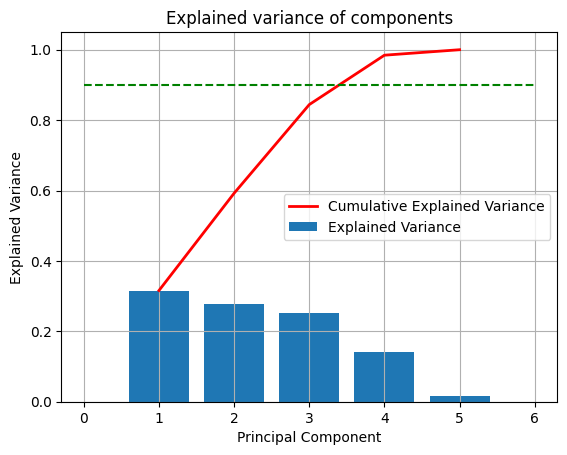

In [148]:
# Reducing features (with pca)
pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots()
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label="Explained Variance")
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label="Cumulative Explained Variance", color="red")
plt.plot([0, pca.n_components_ + 1], [0.9,0.9], "g--")

ax.set_title("Explained variance of components")
ax.set_xlabel("Principal Component")
ax.set_ylabel("Explained Variance")

plt.legend()
plt.grid()
plt.show()

**NOTE:**
- We can infer that feature reduction may be unnecessary as, although 90% of the variance is explained cumulatively by 4/5 principal components, only one of the components had a variance that was signifcantly lower than the others.

- That, combined with the relatively small number of features, may allow us to ignore feature reduction.

## Cross validation

### Ridge regression CV

In [149]:
alphas = [0.1,1.0,10.0,100.0,1000.0,10000.0]
ridge_scores = []

for alpha in alphas:
    ridge = Ridge(alpha = alpha).fit(Train_X_std,Train_Y)
    ridge_scores.append(ridge.score(Test_X_std,Test_Y))

[i for i in zip(alphas,ridge_scores)]

[(0.1, 0.01833807083913286),
 (1.0, 0.018337897109684365),
 (10.0, 0.01833560962388836),
 (100.0, 0.018283736628522562),
 (1000.0, 0.01757753608861712),
 (10000.0, 0.009646779620132384)]

In [150]:
ind = np.argsort(ridge_scores)[-1]
ALPHA_RIDGE = alphas[ind]
print(f"The alpha value of {ALPHA_RIDGE} appears to be the best")

The alpha value of 0.1 appears to be the best


In [167]:
np.argsort([1,9,2,8,3,7,4,6]), np.argsort([1,9,2,8,3,7,4,6])[-1]

(array([0, 2, 4, 6, 7, 5, 3, 1], dtype=int64), 1)

### Lasso regression CV

In [151]:
alphas = [0.1,1.0,10.0,100.0,1000.0,10000.0]
lasso_scores = []

for alpha in alphas:
    lasso = Lasso(alpha = alpha).fit(Train_X_std,Train_Y)
    lasso_scores.append(lasso.score(Test_X_std,Test_Y))

[i for i in zip(alphas,lasso_scores)]

[(0.1, 0.018338093260239385),
 (1.0, 0.018338125203598565),
 (10.0, 0.018338431286747725),
 (100.0, 0.018340923377363483),
 (1000.0, 0.01831263854922016),
 (10000.0, 0.01667083501355804)]

In [152]:
ind = np.argsort(lasso_scores)[-1]
ALPHA_LASSO = alphas[ind]
print(f"The alpha value of {ALPHA_RIDGE} appears to be the best")

The alpha value of 0.1 appears to be the best


# Predictive Modelling

### Evaluation functions

In [153]:
Train_X_std.nunique()

holiday_flag       2
temperature     2988
fuel_price       834
cpi             1945
unemployment     333
dtype: int64

In [154]:
# Function to evaluate models
columns = ["Train-R2","Test-R2","Train-RSS","Test-RSS","Train-MSE","Test-MSE","Train-RMSE","Test-RMSE"]
Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([1,8]), columns=columns)
random_two_columns = np.random.choice(Train_X_std.loc[:, Train_X_std.nunique()>2].columns.values, 2, replace=False)

In [155]:
def Evaluate(column_index, pred_train, pred_test):
    fig, axes = plt.subplots(2,1)
    
    for index, column in enumerate(random_two_columns):
            axes[index].scatter(y = Train_Y, x = Train_X_std[column], label = f"Actual - {column}")
            axes[index].scatter(y = pred_train, x = Train_X_std[column], label = f"Prediction - {column}")
            axes[index].set_xlabel(column)
            axes[index].set_title(f"Target vs {column}")
            axes[index].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Evaluating the Multiple Linear Regression Model
    print("\n\n{}Training Set Metrics{}".format("-"*20,"-"*20))
    print("\nR2-Score on Training set --->",round(r2_score(Train_Y,pred_train),20))
    print("Residual Sum of Squares (RSS) on Training set  --->",round(np.sum(np.square(Train_Y-pred_train)),20))
    print("Mean Squared Error (MSE) on Training set       --->",round(mean_squared_error(Train_Y,pred_train),20))
    print("Root Mean Squared Error (RMSE) on Training set --->",round(np.sqrt(mean_squared_error(Train_Y,pred_train)),20))
    
    print("\n{}Testing Set Metrics{}".format("-"*20,"-"*20))
    print("\nR2-Score on Testing set --->",round(r2_score(Test_Y,pred_test),20))
    print("Residual Sum of Squares (RSS) on Training set  --->",round(np.sum(np.square(Test_Y-pred_test)),20))
    print("Mean Squared Error (MSE) on Training set       --->",round(mean_squared_error(Test_Y,pred_test),20))
    print("Root Mean Squared Error (RMSE) on Training set --->",round(np.sqrt(mean_squared_error(Test_Y,pred_test)),20))
    print("\n{}Residual Plots{}".format("-"*20,"-"*20))
    
    Model_Evaluation_Comparison_Matrix.loc[column_index,"Train-R2"]  = round(r2_score(Train_Y,pred_train),20)
    Model_Evaluation_Comparison_Matrix.loc[column_index,"Test-R2"]   = round(r2_score(Test_Y,pred_test),20)
    Model_Evaluation_Comparison_Matrix.loc[column_index,"Train-RSS"] = round(np.sum(np.square(Train_Y-pred_train)),20)
    Model_Evaluation_Comparison_Matrix.loc[column_index,"Test-RSS"]  = round(np.sum(np.square(Test_Y-pred_test)),20)
    Model_Evaluation_Comparison_Matrix.loc[column_index,"Train-MSE"] = round(mean_squared_error(Train_Y,pred_train),20)
    Model_Evaluation_Comparison_Matrix.loc[column_index,"Test-MSE"]  = round(mean_squared_error(Test_Y,pred_test),20)
    Model_Evaluation_Comparison_Matrix.loc[column_index,"Train-RMSE"] = round(np.sqrt(mean_squared_error(Train_Y,pred_train)),20)
    Model_Evaluation_Comparison_Matrix.loc[column_index,"Test-RMSE"] = round(np.sqrt(mean_squared_error(Test_Y,pred_test)),20)
    
    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])
    
    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred_train))
    plt.title("Error Terms")
    plt.xlabel("Errors")
    
    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred_train)
    plt.plot([Train_Y.min(), Train_Y.max()], [Train_Y.min(), Train_Y.max()], "r--")
    plt.title("Test vs Prediction")
    plt.xlabel("y_test")
    plt.ylabel("y_pred")
    plt.show()

In [156]:
random_two_columns

array(['fuel_price', 'temperature'], dtype=object)

In [157]:
def Evaluate_All():
    # Linear regression model
    MLR = LinearRegression().fit(Train_X_std, Train_Y)
    pred_train = MLR.predict(Train_X_std)
    pred_test = MLR.predict(Test_X_std)
    print("{}{} Evaluating Multiple Linear Regression Model {}{}\n".format("<"*3,"-"*35,"-"*35,">"*3))
    print("The Intercept of the Regresion Model was found to be ",MLR.intercept_)
    Evaluate(0, pred_train, pred_test)
    
    # Ridge regression model
    RLR = Ridge(alpha = ALPHA_RIDGE).fit(Train_X_std,Train_Y)
    pred_train = RLR.predict(Train_X_std)
    pred_test = RLR.predict(Test_X_std)
    print("{}{} Evaluating Ridge Regression Model {}{}\n".format("<"*3,"-"*35,"-"*35,">"*3))
    print("The Intercept of the Regresion Model was found to be ",MLR.intercept_)
    Evaluate(1,pred_train,pred_test)
    
    # Lasso Regression model
    LLR = Lasso(alpha = ALPHA_LASSO).fit(Train_X_std,Train_Y)
    pred_train = LLR.predict(Train_X_std)
    pred_test = LLR.predict(Test_X_std)
    print("{}{} Evaluating Lasso Regression Model {}{}\n".format("<"*3,"-"*35,"-"*35,">"*3))
    print("The Intercept of the Regresion Model was found to be ",MLR.intercept_)
    Evaluate(2,pred_train,pred_test)

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1045607.0351452462


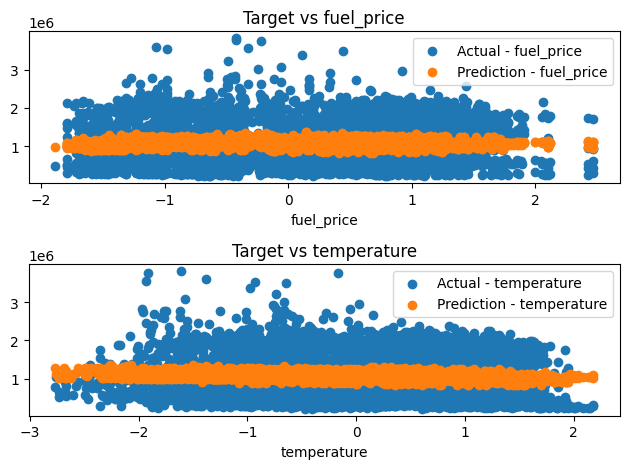



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.01933361902065389
Residual Sum of Squares (RSS) on Training set  ---> 1517870132901052.5
Mean Squared Error (MSE) on Training set       ---> 318880280021.2295
Root Mean Squared Error (RMSE) on Training set ---> 564694.855670945

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.018338089478484587
Residual Sum of Squares (RSS) on Training set  ---> 393573501062541.6
Mean Squared Error (MSE) on Training set       ---> 330456340102.8897
Root Mean Squared Error (RMSE) on Training set ---> 574853.3205113194

--------------------Residual Plots--------------------


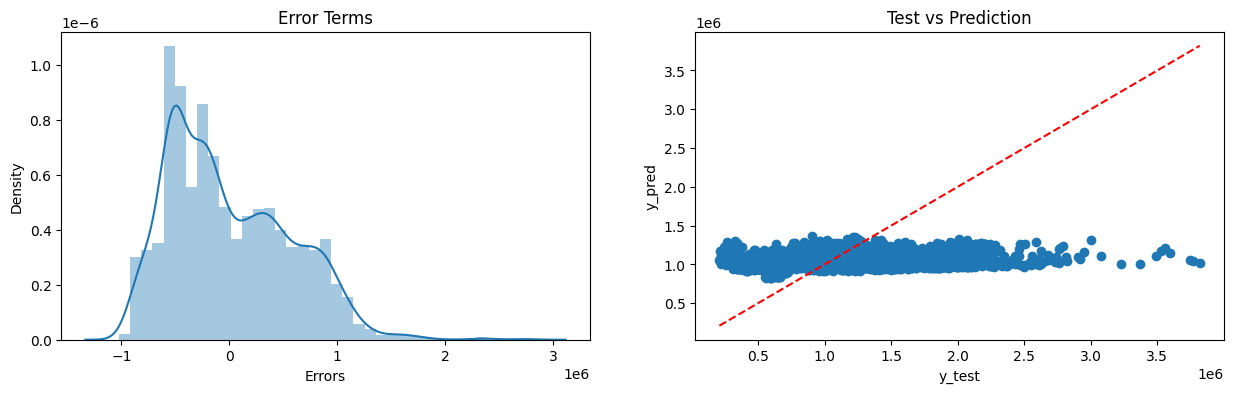

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1045607.0351452462


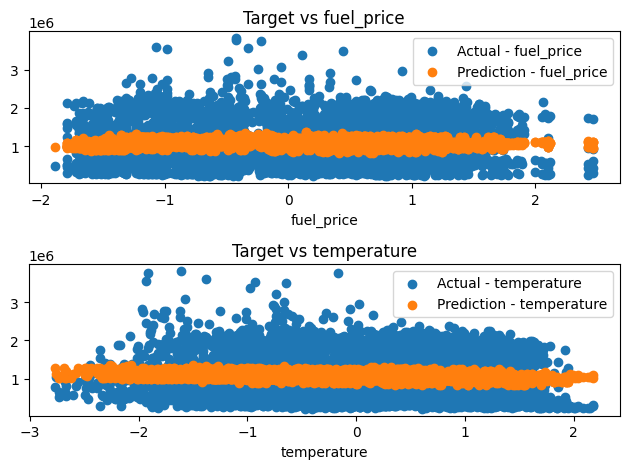



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.019333618908677463
Residual Sum of Squares (RSS) on Training set  ---> 1517870133074369.0
Mean Squared Error (MSE) on Training set       ---> 318880280057.64056
Root Mean Squared Error (RMSE) on Training set ---> 564694.8557031847

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.01833807083913286
Residual Sum of Squares (RSS) on Training set  ---> 393573508535537.0
Mean Squared Error (MSE) on Training set       ---> 330456346377.445
Root Mean Squared Error (RMSE) on Training set ---> 574853.3259688466

--------------------Residual Plots--------------------


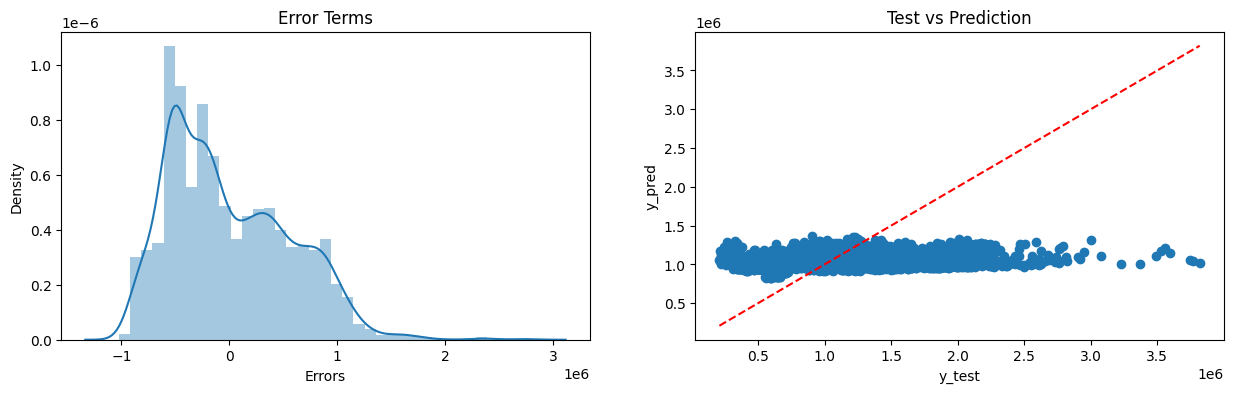

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1045607.0351452462


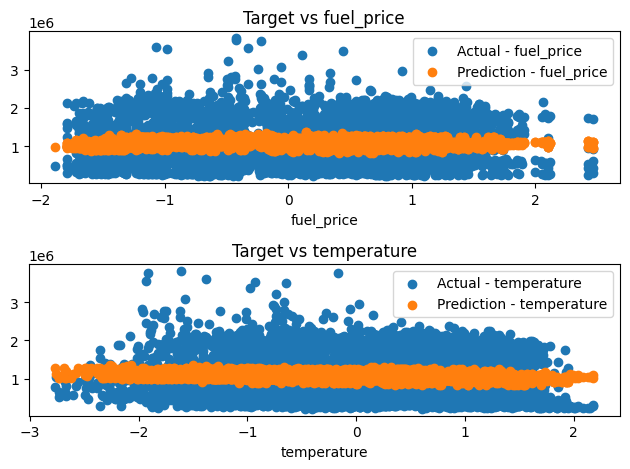



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.01933302858772823
Residual Sum of Squares (RSS) on Training set  ---> 1517871046769949.0
Mean Squared Error (MSE) on Training set       ---> 318880472010.49347
Root Mean Squared Error (RMSE) on Training set ---> 564695.025664733

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.018340923377363483
Residual Sum of Squares (RSS) on Training set  ---> 393572364879614.0
Mean Squared Error (MSE) on Training set       ---> 330455386128.979
Root Mean Squared Error (RMSE) on Training set ---> 574852.4907565236

--------------------Residual Plots--------------------


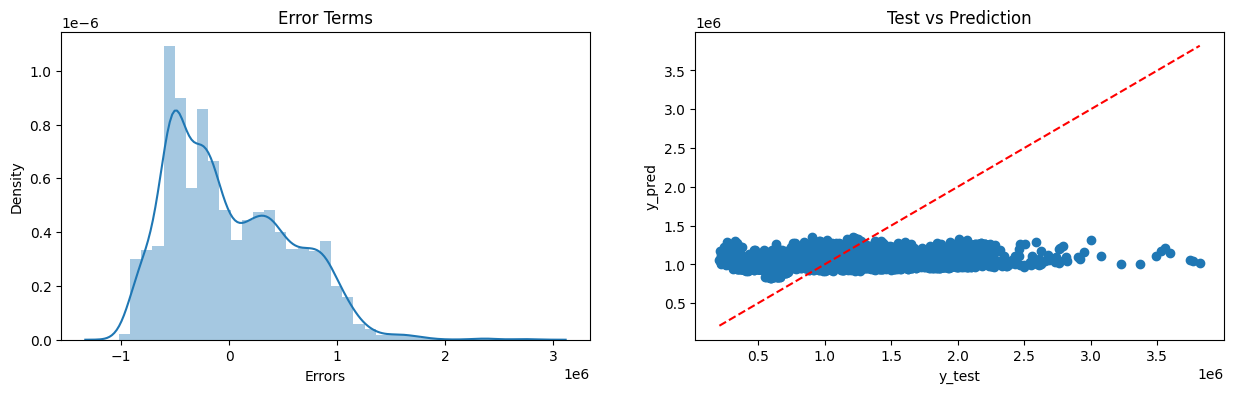

In [158]:
Evaluate_All()

## Comparing the model evaluation metrics

In [159]:
Model_Evaluation_Comparison_Matrix

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
0,0.019334,0.018338,1.517870e+15,3.935735e+14,3.188803e+11,3.304563e+11,564694.855671,574853.320511
1,0.019334,0.018338,1.517870e+15,3.935735e+14,3.188803e+11,3.304563e+11,564694.855703,574853.325969
2,0.019333,0.018341,1.517871e+15,3.935724e+14,3.188805e+11,3.304554e+11,564695.025665,574852.490757


In [160]:
# Regression Models Results Evaluation
MECM = Model_Evaluation_Comparison_Matrix.copy()
MECM.index = ["Multiple Linear Regression (MLR)","Ridge Linear Regression (RLR)","Lasso Linear Regression (LLR)"]
MECM

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.019334,0.018338,1.517870e+15,3.935735e+14,3.188803e+11,3.304563e+11,564694.855671,574853.320511
Ridge Linear Regression (RLR),0.019334,0.018338,1.517870e+15,3.935735e+14,3.188803e+11,3.304563e+11,564694.855703,574853.325969
Lasso Linear Regression (LLR),0.019333,0.018341,1.517871e+15,3.935724e+14,3.188805e+11,3.304554e+11,564695.025665,574852.490757


In [161]:
MECM["Train-R2"].sort_values(ascending=True)

Lasso Linear Regression (LLR)       0.019333
Ridge Linear Regression (RLR)       0.019334
Multiple Linear Regression (MLR)    0.019334
Name: Train-R2, dtype: float64

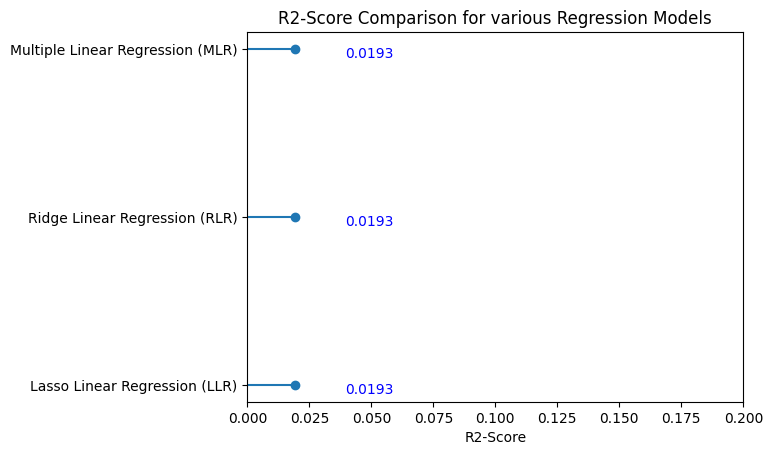

In [162]:
# R2 score comparison for different regression models
R2 = round(MECM["Train-R2"].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index, "o")
plt.title("R2-Score Comparison for various Regression Models")
plt.xlabel("R2-Score")

for index, score in enumerate(R2):
    plt.text(score + 0.02, index - 0.05, score, color="blue")
    plt.xlim([0, 0.2])
plt.show()

In [169]:
MECM.sort_values("Train-RMSE")

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.019334,0.018338,1.517870e+15,3.935735e+14,3.188803e+11,3.304563e+11,564694.855671,574853.320511
Ridge Linear Regression (RLR),0.019334,0.018338,1.517870e+15,3.935735e+14,3.188803e+11,3.304563e+11,564694.855703,574853.325969
Lasso Linear Regression (LLR),0.019333,0.018341,1.517871e+15,3.935724e+14,3.188805e+11,3.304554e+11,564695.025665,574852.490757


In [170]:
MECM.sort_values("Test-RMSE")

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Lasso Linear Regression (LLR),0.019333,0.018341,1.517871e+15,3.935724e+14,3.188805e+11,3.304554e+11,564695.025665,574852.490757
Multiple Linear Regression (MLR),0.019334,0.018338,1.517870e+15,3.935735e+14,3.188803e+11,3.304563e+11,564694.855671,574853.320511
Ridge Linear Regression (RLR),0.019334,0.018338,1.517870e+15,3.935735e+14,3.188803e+11,3.304563e+11,564694.855703,574853.325969


### RMSE comparisons

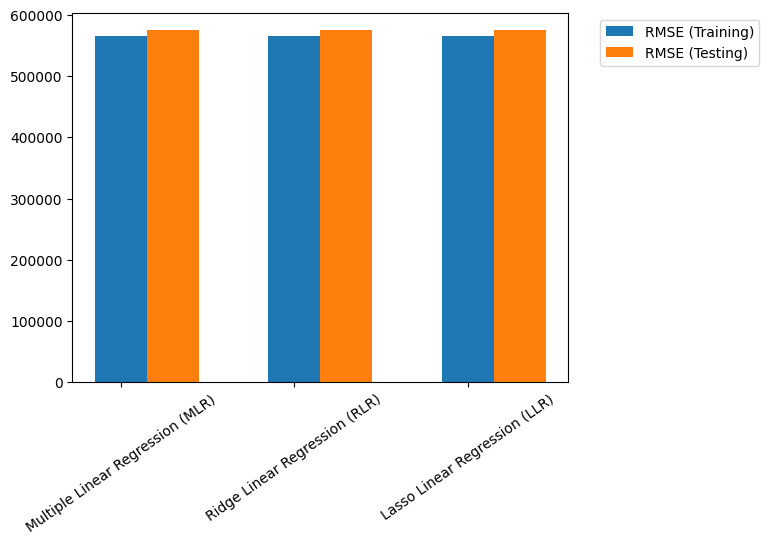

In [165]:
# RMSE comparison for different regression Models
columns = Model_Evaluation_Comparison_Matrix.columns
n = MECM.shape[0]

plt.bar(np.arange(n), MECM['Train-RMSE'], width=0.3, label="RMSE (Training)")
plt.bar(np.arange(n)+0.3, MECM['Test-RMSE'], width=0.3, label="RMSE (Testing)")
plt.xticks(np.arange(n), MECM.index, rotation=35)
plt.legend(bbox_to_anchor=(1.05,1.0), loc='upper left')
plt.show()

### Inference
- Lower RMSE implies a better the model
- That said, significant disparity between training and testing scores would suggest overfitting.
- All models were fairly similar in terms of training and test RMSE
- There was no large disparity between training and testing RMSEs for any model
- However, Lasso Regression narrowly gave the best overall results based on Test RMSE

# Conclusions

Here are some key conclusions:
- The dataset was quite small with just 6435 samples initially, which dropped 7.5% after cleaning.
- Cross validating the Lasso and Ridge regressions allowed us to select the best alpha.
- We will proceed with the Lasso Regression model based on RMSE.

# Further steps

These are some further steps to consider:
- performing regression with consideration for store to store differences
- random forest with bagging, boosting etc
- performing cross validation with an sklearn library instead of with a for loop
- using polynomial regression as well
- reducing data to 4 dimensions instead of 5